# Titanic: Machine Learning from Disaster



# Goal:
To predict if a passenger survived the sinking of the Titanic or not. 


In [1]:
#importing libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import sklearn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier)
# from sklearn import preprocessing as pp
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from pandas_ml import ConfusionMatrix


C:\Users\SONALI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import Dataset
path = "F:/Projects/Kaggle Compitition/titanic/train.csv"
titanic = pd.read_csv(path)

# Dataset Analysis
After importing dataset, first we have to analyse the dataset to know dataset better. For EDA process.
### Variable discription
          Variable        Definition	          Key
          survival	       Survival	         0 = No, 1 = Yes
           pclass	     Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd
            sex	             Sex	
            Age	         Age in years	
           sibsp	  # of siblings / spouses aboard the Titanic	
           parch	  # of parents / children aboard the Titanic	
          ticket	     Ticket number	
           fare	         Passenger fare	
          cabin	         Cabin number	
          embarked	    Port of Embarkation	    C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
titanic.shape    #show number of rows and columns

(891, 12)

In [4]:
titanic.head(10)   # Will display first 10 records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic.describe()      ##describes numeric variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()    #dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In dataset information we can see, the number of columns, columnwise count of records and datatype.
Missing values are present ni 3 columns.
To check the count of number of missing values of each columns.

In [7]:
#Check wheather missing values
titanic.isnull().sum()[titanic.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
#check levels of object
titanic.groupby('Cabin').size()

Cabin
A10      1
A14      1
A16      1
A19      1
A20      1
A23      1
A24      1
A26      1
A31      1
A32      1
A34      1
A36      1
A5       1
A6       1
A7       1
B101     1
B102     1
B18      2
B19      1
B20      2
B22      2
B28      2
B3       1
B30      1
B35      2
B37      1
B38      1
B39      1
B4       1
B41      1
        ..
E12      1
E121     2
E17      1
E24      2
E25      2
E31      1
E33      2
E34      1
E36      1
E38      1
E40      1
E44      2
E46      1
E49      1
E50      1
E58      1
E63      1
E67      2
E68      1
E77      1
E8       2
F E69    1
F G63    1
F G73    2
F2       3
F33      3
F38      1
F4       2
G6       4
T        1
Length: 147, dtype: int64

In [9]:
titanic.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [10]:
titanic.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [11]:
titanic.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [12]:
titanic.groupby('Pclass').size()


Pclass
1    216
2    184
3    491
dtype: int64

In [13]:
titanic.groupby('SibSp').size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [14]:
titanic.groupby('Parch').size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [15]:
titanic.groupby('Ticket').size()

Ticket
110152               3
110413               3
110465               2
110564               1
110813               1
111240               1
111320               1
111361               2
111369               1
111426               1
111427               1
111428               1
112050               1
112052               1
112053               1
112058               1
112059               1
112277               1
112379               1
113028               1
113043               1
113050               1
113051               1
113055               1
113056               1
113059               1
113501               1
113503               1
113505               2
113509               1
                    ..
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON

# What is the distribution of categorical features?
Names are unique across the dataset (count=unique=891).
Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
Embarked takes three possible values. S port used by most passengers (top=S).
Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [16]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Miss. Dorothy Edith ""Dolly""",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


## Assumtions based on data analysis
#### Correcting
Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
Cabin feature may be dropped as it is highly incomplete or contains many null values in training dataset.
Name and PassengerId may be dropped from training dataset as it does not contribute to survival.
    
#### Classifying
Assumptions based on the problem description: 
Women (Sex=female) were more likely to have survived.
Children (Age<?) were more likely to have survived.
The upper-class passengers (Pclass=1) were more likely to have survived.


In [17]:
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [18]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
titanic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Deleting columns and Dealing with missing values
   int column missing values replace with median, object column replace with highest level of that column And delete columns, which contains above 75% missing value.

In [20]:
titanic = titanic.drop(['Name'],axis = 1)
titanic = titanic.drop(['Ticket'],axis = 1)
#delete the column Cabin (cotain greater than 75% missing values)
titanic = titanic.drop(['Cabin'],axis = 1)

# And delete from titanic for easy access
titanic = titanic.drop(['PassengerId'], axis = 1)
# Replace missing values
titanic.Embarked[titanic.Embarked.isnull()] = "S" #with unknown level

# replace with median
age_median = titanic['Age'].median()
titanic.Age[titanic.Age.isnull()] = age_median

C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [21]:
# Mapping Embarked
titanic.Embarked[titanic.Embarked == 'C'] = 0
titanic.Embarked[titanic.Embarked == 'Q'] = 1
titanic.Embarked[titanic.Embarked == 'S'] = 2

# Mapping Sex
titanic.Sex[titanic.Sex == 'male'] = 0
titanic.Sex[titanic.Sex == 'female'] = 1

# convert the column datatype from string to numeric 
titanic[['Embarked']] = titanic[['Embarked']].apply(pd.to_numeric)
titanic[['Sex']] = titanic[['Sex']].apply(pd.to_numeric)

C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SONALI\Anaconda3\

# Data Visualization
### Correlating numerical Variables
 Histogram chart is useful for analyzing continous numerical variables like Age, will help to identify useful patterns. The histogram can indicate distribution of samples.
Note: x-axis in historgram visualizations represents the count of samples or passengers.
### Observations
Infants (Age <=4) had high survival rate.
Oldest passengers (Age = 80) survived.
Large number of 15-25 year olds did not survive.
Most passengers are in 15-35 age range.
Mapping and converting datatype to int

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


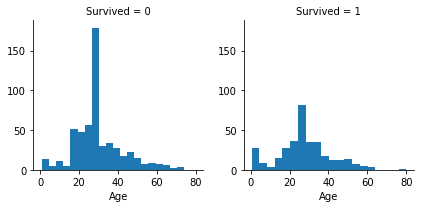

In [23]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

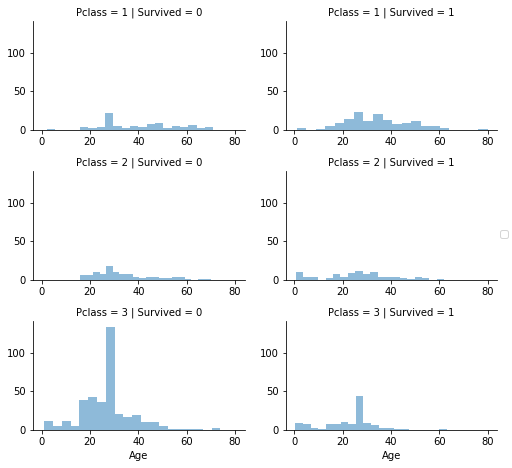

In [24]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

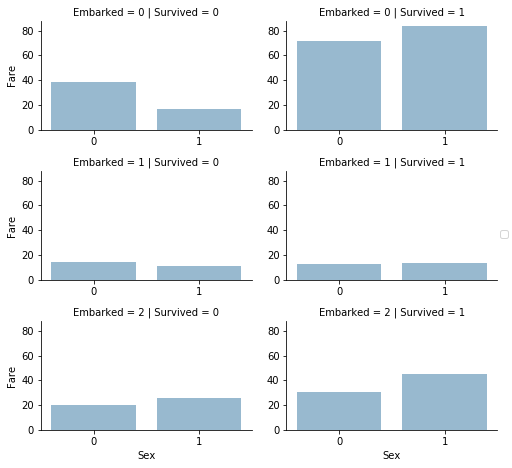

In [25]:
# Will show distibution of Embarked vs Fare when Survived = 0 and Survived = 1
grid = sns.FacetGrid(titanic, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

 ### Correlation
 Let us generate correlation plots of the features to see how they are related. For that we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

In [26]:
# to find the correlation among variables (Multicollinearity)
# ----------------------------------------------------------
titanic.corr()
cor = titanic.iloc[:,1:8].corr()
print(cor)
    

            Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
Pclass    1.000000 -0.131900 -0.339898  0.083081  0.018443 -0.549500  0.162098
Sex      -0.131900  1.000000 -0.081163  0.114631  0.245489  0.182333 -0.108262
Age      -0.339898 -0.081163  1.000000 -0.233296 -0.172482  0.096688 -0.018754
SibSp     0.083081  0.114631 -0.233296  1.000000  0.414838  0.159651  0.068230
Parch     0.018443  0.245489 -0.172482  0.414838  1.000000  0.216225  0.039798
Fare     -0.549500  0.182333  0.096688  0.159651  0.216225  1.000000 -0.224719
Embarked  0.162098 -0.108262 -0.018754  0.068230  0.039798 -0.224719  1.000000


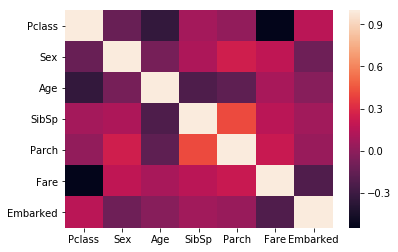

In [27]:
# correlation using visualization
# -------------------------------
# cor --> defined above as the correlation amongst the x-variables
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)


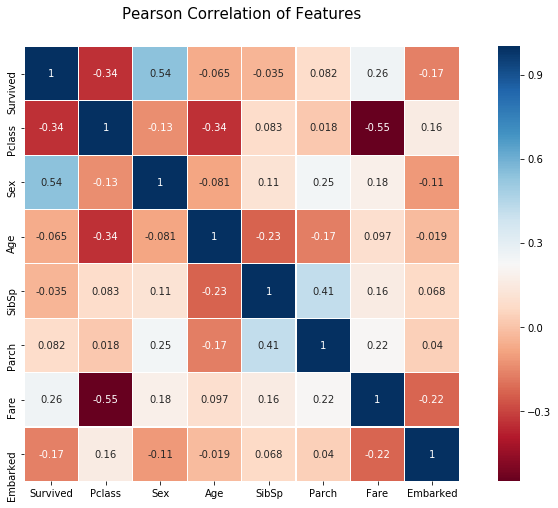

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### Takeaway from the Plots
Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here most correlated features are that of Sex & Survived and SibSp & Parch (Parents and Children).

### Pairplots
Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn.

C:\Users\SONALI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\SONALI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


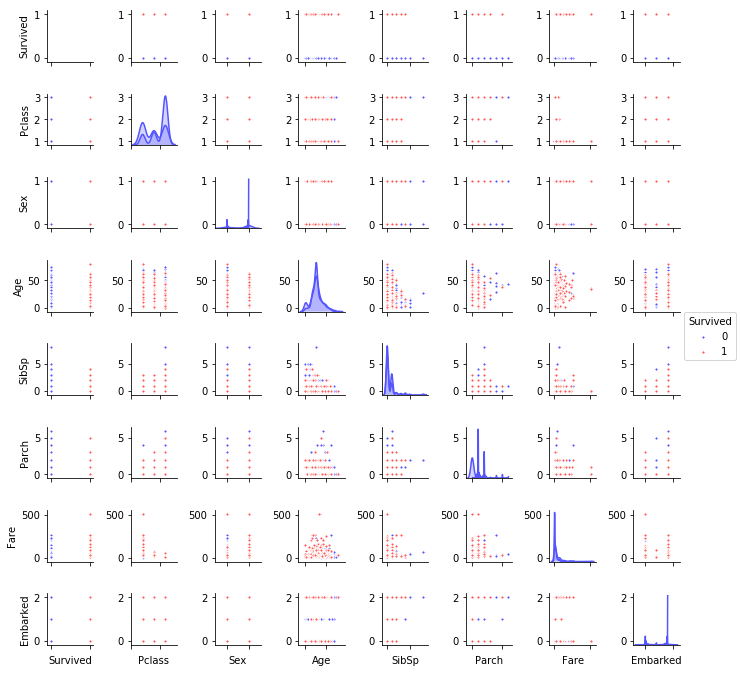

In [29]:
g = sns.pairplot(titanic[[u'Survived', u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare',
                        u'Embarked']], hue='Survived', palette = 'seismic',size=1.2,diag_kind = 'kde',
                 diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

### Model Building

In [30]:
#Split train data into train1 and test1
train,test = train_test_split(titanic, test_size = 0.3)
train.shape

(623, 8)

In [31]:
test.shape

(268, 8)

In [32]:
x_train = train.iloc[:,1:8]
x_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [33]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [34]:
y_train = train.iloc[:,0:1]
y_train.columns

Index(['Survived'], dtype='object')

In [35]:
x_test = test.iloc[:,1:8]
y_test = test.iloc[:,0:1]
x_test.shape

(268, 7)

### Model building using different algorithms

In [36]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(titanic.iloc[:,1:8], titanic.iloc[:,0:1]) * 100, 2)
acc_log

C:\Users\SONALI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


79.909999999999997

Predicted    0    1  __all__
Actual                      
0          136   27      163
1           23   82      105
__all__    159  109      268
##############################
population: 268
P: 105
N: 163
PositiveTest: 109
NegativeTest: 159
TP: 82
TN: 136
FP: 27
FN: 23
TPR: 0.780952380952
TNR: 0.834355828221
PPV: 0.752293577982
NPV: 0.85534591195
FPR: 0.165644171779
FDR: 0.247706422018
FNR: 0.219047619048
ACC: 0.813432835821
F1_score: 0.766355140187
MCC: 0.611461827404
informedness: 0.615308209173
markedness: 0.607639489931
prevalence: 0.391791044776
LRP: 4.71463844797
LRN: 0.262535014006
DOR: 17.9581320451
FOR: 0.14465408805
Accuracy of logistic regression classifier on test set: 0.81


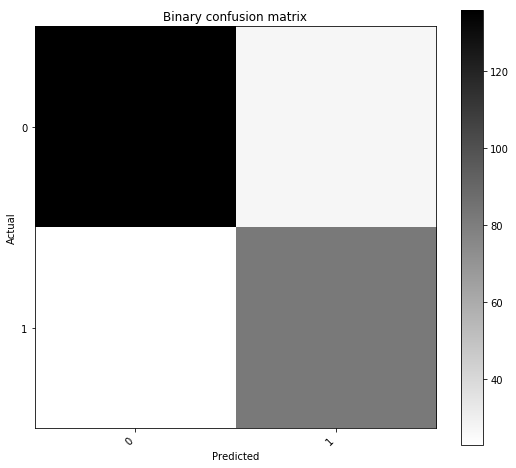

In [37]:
# confusion matrix
# -----------------------------
ty=y_test['Survived'].tolist()
cm1=ConfusionMatrix(y_pred,ty)
print(cm1)
print('#'*30)
cm1.print_stats()
lr = logreg.score(x_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr))
cm1.plot()

In [38]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred2 = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(titanic.iloc[:,1:8], titanic.iloc[:,0:1]) * 100, 2)
acc_decision_tree


91.810000000000002

Predicted    0    1  __all__
Actual                      
0          129   33      162
1           30   76      106
__all__    159  109      268
##############################
population: 268
P: 106
N: 162
PositiveTest: 109
NegativeTest: 159
TP: 76
TN: 129
FP: 33
FN: 30
TPR: 0.716981132075
TNR: 0.796296296296
PPV: 0.697247706422
NPV: 0.811320754717
FPR: 0.203703703704
FDR: 0.302752293578
FNR: 0.283018867925
ACC: 0.764925373134
F1_score: 0.706976744186
MCC: 0.510917519649
informedness: 0.513277428372
markedness: 0.508568461139
prevalence: 0.39552238806
LRP: 3.51972555746
LRN: 0.35541904344
DOR: 9.90303030303
FOR: 0.188679245283
Accuracy of Decision Tree on test set: 0.76


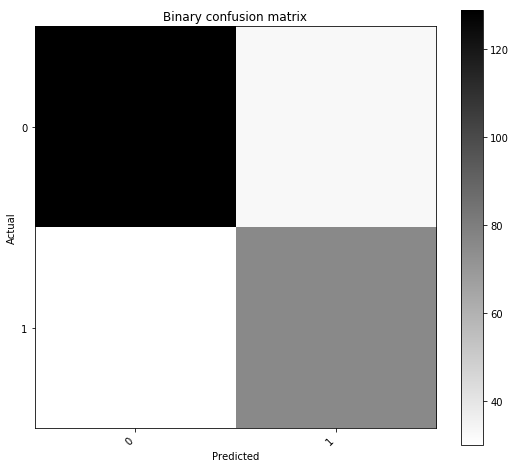

In [39]:
# confusion matrix
# -----------------------------
cm2=ConfusionMatrix(y_pred2,ty)
print(cm2)
print('#'*30)
cm2.print_stats()
dt = accuracy_score(y_test, y_pred2)
print('Accuracy of Decision Tree on test set: {:.2f}'.format(dt))
cm2.plot()

In [40]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred3 = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(titanic.iloc[:,1:8], titanic.iloc[:,0:1]) * 100, 2)
acc_random_forest


C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


93.040000000000006

Predicted    0    1  __all__
Actual                      
0          131   24      155
1           28   85      113
__all__    159  109      268
##############################
population: 268
P: 113
N: 155
PositiveTest: 109
NegativeTest: 159
TP: 85
TN: 131
FP: 24
FN: 28
TPR: 0.752212389381
TNR: 0.845161290323
PPV: 0.779816513761
NPV: 0.823899371069
FPR: 0.154838709677
FDR: 0.220183486239
FNR: 0.247787610619
ACC: 0.805970149254
F1_score: 0.765765765766
MCC: 0.600536409901
informedness: 0.597373679703
markedness: 0.603715884831
prevalence: 0.421641791045
LRP: 4.85803834808
LRN: 0.293183814092
DOR: 16.5699404762
FOR: 0.176100628931
Accuracy of Random Forest on test set: 0.81


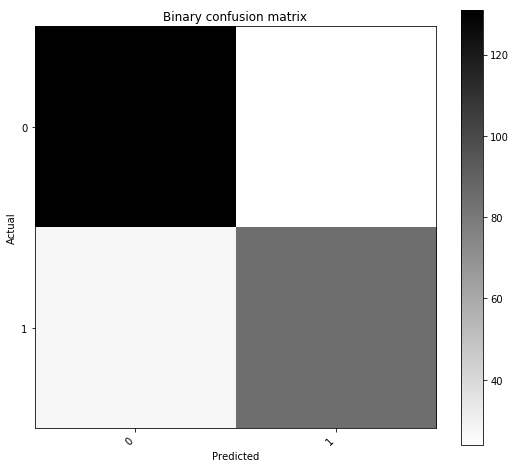

In [41]:
# confusion matrix
# -----------------------------
cm3=ConfusionMatrix(y_pred3,ty)
print(cm3)
print('#'*30)
cm3.print_stats()
rf = accuracy_score(y_test, y_pred3)
print('Accuracy of Random Forest on test set: {:.2f}'.format(rf))
cm3.plot()

## Model evaluation
Rank our evaluation of all the models to choose the best one for our problem.
Random Forest model is better as compare to other models.
Below Dataframe information, Model: Name of algorithm, Set(Test Accuracy) : Accuracy of model on test set of main training dataset, and Score: Accuracy of main dataset(i.e. titanic).

In [42]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',  
              'Decision Tree',
              'Random Forest'],
    'Set(Test Accuracy )': [lr,dt,rf],
    'Score': [acc_log,
              acc_decision_tree,
              acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Set(Test Accuracy )
2,Random Forest,93.04,0.805970
1,Decision Tree,91.81,0.764925
0,Logistic Regression,79.91,0.813433


## Import test dataset, EDA, Prediction

In [43]:
path = "F:/Projects/Kaggle Compitition/titanic/test.csv"
Test = pd.read_csv(path)
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
Test = Test.drop(['Name'],axis = 1)
Test = Test.drop(['Ticket'],axis = 1)
#delete the column Cabin (cotain greater than 75% missing values)
Test = Test.drop(['Cabin'],axis = 1)

# Store PassengerId  in Test_PId
Test_PId = Test['PassengerId']
# And delete from titanic for easy access
Test = Test.drop(['PassengerId'], axis = 1)
# Replace missing values
Test.Embarked[Test.Embarked.isnull()] = "S" #with unknown level

# replace with median
age_median = Test['Age'].median()
Test.Age[Test.Age.isnull()] = age_median

Fare_median = Test['Fare'].median()
Test.Fare[Test.Fare.isnull()] = Fare_median

# Mapping Embarked
Test.Embarked[Test.Embarked == 'C'] = 0
Test.Embarked[Test.Embarked == 'Q'] = 1
Test.Embarked[Test.Embarked == 'S'] = 2

# Mapping Sex
Test.Sex[Test.Sex == 'male'] = 0
Test.Sex[Test.Sex == 'female'] = 1

# convert the column datatype from string to numeric 
Test[['Embarked']] = Test[['Embarked']].apply(pd.to_numeric)
Test[['Sex']] = Test[['Sex']].apply(pd.to_numeric)
Test.info()

C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SONALI\Anaconda3\lib\site-packages\ipyke

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [45]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [46]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


In [47]:
y_pred_final = random_forest.predict(Test)

In [48]:
Solution = pd.DataFrame({
        "PassengerId": Test_PId,
        "Survived": y_pred_final
    })

In [50]:
# Export Solution
Solution.to_csv('F:/Projects/Kaggle Compitition/titanic/Test_Prediction.csv')